In [109]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

Read the files

In [110]:
train = pd.read_csv("C:/Users/Sudeshna Hazra/Documents/Python Scripts/train.csv")
test = pd.read_csv("C:/Users/Sudeshna Hazra/Documents/Python Scripts/test.csv")

Combine train and test data into a dataframe ‘data’ with a ‘source’ column specifying where each observation belongs.


In [111]:
train['source'] ="train"
test["source"] = "test"

In [112]:
data = pd.concat([train,test],ignore_index=True)

In [113]:
data.head(10)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes,train
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No,train
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No,train
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No,train
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No,train


In [114]:
print(train.shape,test.shape,data.shape)

(614, 14) (367, 13) (981, 14)


Missing value check for each variable

In [115]:
data.isnull().sum() # check for missing values

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [116]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

In [117]:
data.describe() # get summary of numerical variables

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


LoanAmount has 27 missing values.
Loan_Amount_Term has 20 missing values.
Credit_History has 79 missing values.
83% applicants have a credit_history as the mean of Credit_History field is 0.84
(Credit_History has value 1 for those who have a credit history and 0 otherwise)


In [118]:
data.apply(lambda x: len(x.unique()))

ApplicantIncome      752
CoapplicantIncome    437
Credit_History         3
Dependents             5
Education              2
Gender                 3
LoanAmount           233
Loan_Amount_Term      13
Loan_ID              981
Loan_Status            3
Married                3
Property_Area          3
Self_Employed          3
source                 2
dtype: int64

In [119]:
data.dtypes

ApplicantIncome        int64
CoapplicantIncome    float64
Credit_History       float64
Dependents            object
Education             object
Gender                object
LoanAmount           float64
Loan_Amount_Term     float64
Loan_ID               object
Loan_Status           object
Married               object
Property_Area         object
Self_Employed         object
source                object
dtype: object

Filter categorical vars

In [120]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns

['Dependents',
 'Education',
 'Gender',
 'Loan_ID',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed',
 'source']

Exclude ID cols and source

In [121]:
categorical_columns = [x for x in categorical_columns if x not in['Loan_ID','source'] ]
categorical_columns

['Dependents',
 'Education',
 'Gender',
 'Loan_Status',
 'Married',
 'Property_Area',
 'Self_Employed']

Print frequency of each categories

In [122]:
for x in categorical_columns:
    print("\nFrequency of each variable: %s"%x)
    print(data[x].value_counts())


Frequency of each variable: Dependents
0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

Frequency of each variable: Education
Graduate        763
Not Graduate    218
Name: Education, dtype: int64

Frequency of each variable: Gender
Male      775
Female    182
Name: Gender, dtype: int64

Frequency of each variable: Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64

Frequency of each variable: Married
Yes    631
No     347
Name: Married, dtype: int64

Frequency of each variable: Property_Area
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

Frequency of each variable: Self_Employed
No     807
Yes    119
Name: Self_Employed, dtype: int64


In [123]:
data['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

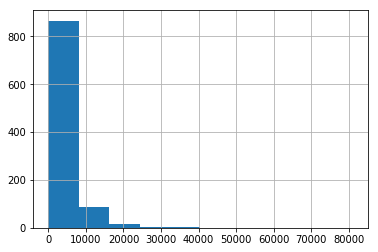

In [124]:
data['ApplicantIncome'].hist()

There are few extreme values

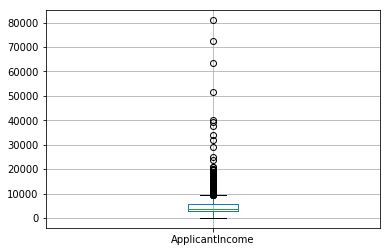

In [125]:
data.boxplot(column='ApplicantIncome')

This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels

C:\New folder\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


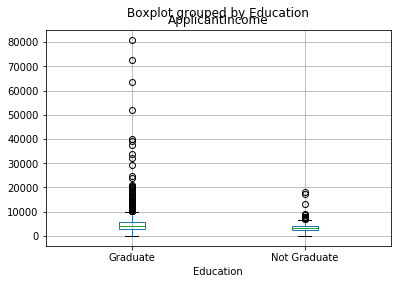

In [126]:
data.boxplot(column ='ApplicantIncome', by ='Education')

There is no substantial difference between the mean income of graduate and non-graduates. 
But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

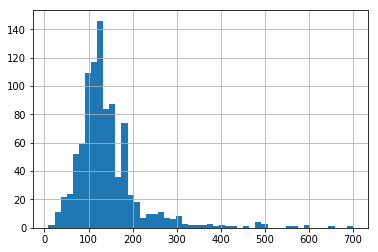

In [127]:
data['LoanAmount'].hist(bins=50)

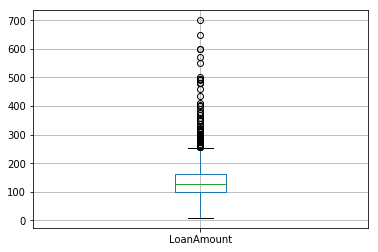

In [128]:
data.boxplot(column='LoanAmount')

Again, there are some extreme values. Both ApplicantIncome and LoanAmount require some amount of data munging.
LoanAmount has missing and well as extreme values, while ApplicantIncome has a few extreme values

# Categorical Variable Analysis

In [129]:
#list of all females who are not graduate and got a loan
data.loc[(data['Gender']=='Female') & (data['Education'] == 'Not Graduate') & (data['Loan_Status']=='Y'),
                ["Gender","Education","Loan_Status"]]
                

,Gender,Education,Loan_Status
50,Female,Not Graduate,Y
197,Female,Not Graduate,Y
205,Female,Not Graduate,Y
279,Female,Not Graduate,Y
403,Female,Not Graduate,Y
407,Female,Not Graduate,Y
439,Female,Not Graduate,Y
463,Female,Not Graduate,Y
468,Female,Not Graduate,Y
480,Female,Not Graduate,Y


In [130]:
impute_grps = data.pivot_table(values=["LoanAmount"], index=["Gender","Married","Self_Employed"], aggfunc=np.mean)
impute_grps

LoanAmount
Gender Married Self_Employed            
Female No      No             111.460000
               Yes            138.714286
       Yes     No             138.530612
               Yes            282.250000
Male   No      No             126.726744
               Yes            159.521739
       Yes     No             148.151242
               Yes            165.173913

1.0    754
0.0    148
Name: Credit_History, dtype: int64


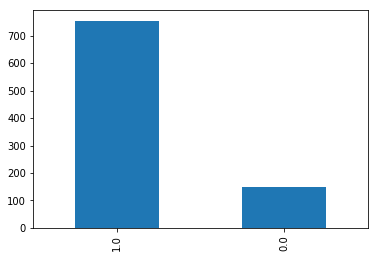

In [131]:
temp1 = data['Credit_History'].value_counts()
print (temp1)

temp1.plot(kind='bar')


Frequency Table for Credit History:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


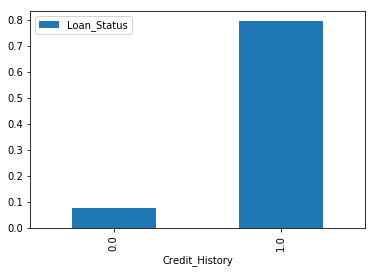

In [132]:
temp2 = data.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Credit History:') 
print(temp2)
temp2.plot(kind = 'bar')

This shows that the chances of getting a loan are eight times if the applicant has a valid credit history. 

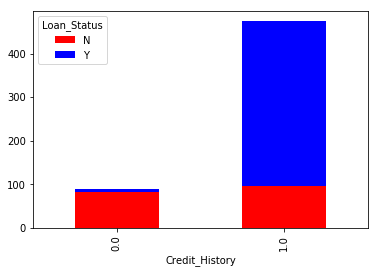

In [133]:
temp3 = pd.crosstab(data['Credit_History'], data['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

These two plots can also be visualized by combining them in a stacked chart

Frequency Table for Property Area :
               Loan_Status
Property_Area             
Rural             0.614525
Semiurban         0.768240
Urban             0.658416


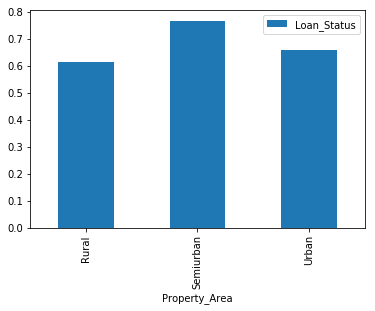

In [134]:
prop = data.pivot_table(values='Loan_Status',index=['Property_Area'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Property Area :') 
print(prop)
prop.plot(kind ='bar')

Frequency Table for Self Employed :
               Loan_Status
Self_Employed             
No                0.686000
Yes               0.682927


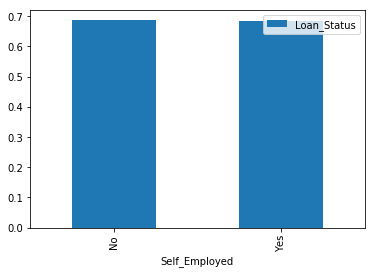

In [135]:
emp = data.pivot_table(values='Loan_Status',index=['Self_Employed'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Self Employed :') 
print(emp)
emp.plot(kind='bar')

Frequency Table for Married :
         Loan_Status
Married             
No          0.629108
Yes         0.716080


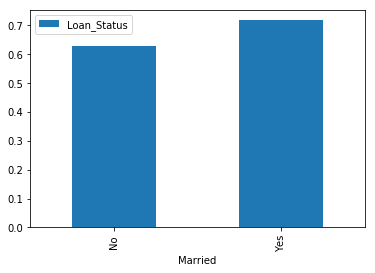

In [136]:
mar = data.pivot_table(values='Loan_Status',index=['Married'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print('Frequency Table for Married :') 
print(mar)
mar.plot(kind='bar')

# Missing value imputation

In [137]:
#Impute the values:
data['Self_Employed'].fillna('No',inplace=True)
data['Gender'].fillna('Male',inplace=True)
data['Married'].fillna('Yes',inplace=True)

In [138]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

In [139]:
table = data.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]
     
#Replace missing values of loan amount
data['LoanAmount'].fillna(data[data['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

In [140]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

Treating extreme values in distribution of LoanAmount and ApplicantIncome

Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect:

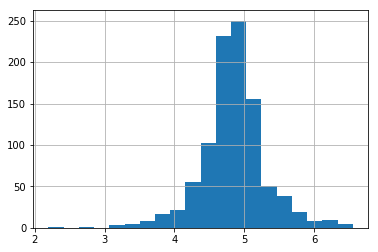

In [141]:
data['LoanAmount'] = np.log(data['LoanAmount'])
data['LoanAmount'].hist(bins=20)

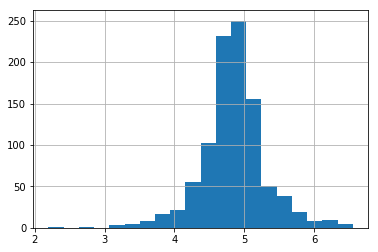

In [142]:
data['TotalIncome'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome'] = np.log(data['TotalIncome'])
data['LoanAmount'].hist(bins=20) 


In [143]:
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)

In [144]:
data.Dependents.fillna(0,inplace=True)
data['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
0      25
Name: Dependents, dtype: int64

In [145]:
data.Credit_History.fillna(data.Credit_History.max(),inplace=True)

In [146]:
data.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount             0
Loan_Amount_Term       0
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
TotalIncome            0
dtype: int64

In [147]:
data = pd.get_dummies(data, columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])

In [150]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,LoanAmount,Loan_Amount_Term,Loan_ID,source,TotalIncome,Gender_Female,...,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,1.0,0,4.867534,360.0,LP001002,train,8.674026,0,...,0,1,0,1,0,0,0,1,0,1
1,4583,1508.0,1.0,1,4.852030,360.0,LP001003,train,8.714568,0,...,1,1,0,1,0,1,0,0,1,0
2,3000,0.0,1.0,0,4.189655,360.0,LP001005,train,8.006368,0,...,1,1,0,0,1,0,0,1,0,1
3,2583,2358.0,1.0,0,4.787492,360.0,LP001006,train,8.505323,0,...,1,0,1,1,0,0,0,1,0,1
4,6000,0.0,1.0,0,4.948760,360.0,LP001008,train,8.699515,0,...,0,1,0,1,0,0,0,1,0,1


In [151]:
data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'LoanAmount', 'Loan_Amount_Term', 'Loan_ID', 'source', 'TotalIncome',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [153]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
  
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
  
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracy : %s" % "{0:.3%}").format(accuracy)

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}").format(np.mean(error))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 

C:\New folder\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [160]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'source'],
      dtype='object')

In [161]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'source'],
      dtype='object')

In [165]:
data.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'LoanAmount', 'Loan_Amount_Term', 'TotalIncome', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_N', 'Loan_Status_Y'],
      dtype='object')

In [170]:
#Drop the columns which have been converted to different types:
#data.drop(['Loan_ID','source'],inplace=True)

#Divide into test and train:
#train = data.loc[data['source']=="train"]
#test = data.loc[data['source']=="test"]



KeyError: 'source'

# Logistic Regression

In [175]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = 'Credit_History'
classification_model(model, train,predictor_var,outcome_var)

ValueError: Expected 2D array, got 1D array instead:
array=[  1.   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.
   1.  nan   0.   1.   1.   0.   1.   0.   0.  nan   1.   1.   1.   1.   1.
  nan   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.  nan   1.   1.
   1.   1.   1.   0.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.
   1.   1.   0.   0.   0.   1.   0.   1.   1.   0.   1.   1.   1.   0.   1.
   1.   1.   1.   0.  nan   1.   1.   1.  nan   1.   1.  nan   1.   1.   1.
   1.   1.   1.   1.   1.  nan   1.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.   0.   1.   1.   1.   0.   1.   1.   1.   1.  nan   1.   1.
   1.   1.   0.   1.   1.  nan   1.   1.   0.  nan  nan   1.   1.   1.   1.
   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
   0.   1.   1.   1.   1.   0.  nan   1.   1.   1.   1.   1.   0.   1.   1.
   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.   1.   0.   1.   0.
   0.  nan   1.   1.   1.   1.   0.  nan   1.   1.   1.   1.   1.   1.   1.
   1.   1.   1.  nan   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.   1.
   1.   0.   1.   1.   1.   1.   1.   1.   0.  nan   0.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.  nan  nan   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   0.
   1.   0.   1.   1.  nan  nan   1.   1.   1.   1.   1.   1.   0.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   1.  nan   0.   1.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   0.   1.   0.   1.   1.   1.   1.   1.   1.
   0.   1.   1.   1.   1.   1.   1.   0.   1.  nan   1.   1.   1.  nan   1.
   1.   1.  nan  nan   1.   1.   1.   1.  nan   1.   0.   0.   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.
   1.   0.   1.  nan   1.   1.   1.   1.   0.   1.   1.   1.   1.   0.   1.
   1.   1.   1.  nan   1.   1.   1.   0.   1.   1.   1.   1.   1.   0.   1.
   1.   1.  nan   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.   1.   1.
   1.   1.  nan   1.   1.  nan   0.   1.   1.   0.   0.   1.   1.   1.   1.
   1.   1.   1.   0.   0.   1.  nan   0.   1.   0.   1.   1.   1.   1.   1.
   1.   0.   1.   0.   1.   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.
   1.   1.   1.   0.   1.   1.   1.   1.   1.  nan   1.   1.   1.   0.  nan
   0.  nan   0.   0.   1.   1.   1.   1.   1.   1.  nan   1.   1.   1.   0.
   1.   0.   1.   1.   1.   1.   0.   1.  nan   1.   1.   1.   0.   1.   1.
   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.  nan  nan   1.   1.   0.
   1.   1.  nan   1.   0.   1.   1.   1.  nan   1.   1.  nan   1.   1.   1.
   1.   1.   1.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.
   1.   1.   0.   1.   1.  nan   1.   0.  nan   1.   1.   1.   1.   1.   1.
   1.   0.   1.   1.  nan   1.   1.   1.   0.   1.   0.   1.   1.   0.   0.
   1.  nan   1.   1.   1.   1.   1.   1.   1.   0.  nan   1.   0.   1.   0.
   1.   0.   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.  nan   0.
   1.   1.   1.   1.   0.   1.   1.   1.   1.   1.   1.   1.   0.   1.   1.
  nan   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.